# Experiment: Week 2 RandomForest

Custom package was under progress. I have used raw codes here and in all of the upcomming experiments, packages have been used

### Import required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns=300
pd.options.display.max_rows=300

In [2]:
# Loading the data
train_df = pd.read_csv('../data/raw/train.csv', low_memory=False)
test_df = pd.read_csv('../data/raw/test.csv', low_memory=False)

## Data Exploration

In [3]:
# first 5 entries of train_df
train_df.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,b2716b2d-3422-4959-9fe7-fe496414a4e8,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,bb387960-e3a0-4ffd-96ae-184bad07cb8a,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,89bbdf11-eadd-4de4-95e5-03f7e2874aa1,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0c87ada8-8446-4ea2-a05b-bd07aed5f37a,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,84661e00-ad20-4308-817e-efa8da52a86c,0.0


In [4]:
# shape of training data
train_df.shape

(46618, 64)

In [5]:
# Counting the nan values
train_df.isna().sum()

team                       0
conf                       0
GP                         0
Min_per                    0
Ortg                       0
usg                        0
eFG                        0
TS_per                     0
ORB_per                    0
DRB_per                    0
AST_per                    0
TO_per                     0
FTM                        0
FTA                        0
FT_per                     0
twoPM                      0
twoPA                      0
twoP_per                   0
TPM                        0
TPA                        0
TP_per                     0
blk_per                    0
stl_per                    0
ftr                        0
yr                       292
ht                        64
num                     4679
porpag                     0
adjoe                      0
pfr                        0
year                       0
type                       0
Rec_Rank               32281
ast_tov                 3467
rimmade       

In [6]:
# feature information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46618 entries, 0 to 46617
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 46618 non-null  object 
 1   conf                 46618 non-null  object 
 2   GP                   46618 non-null  int64  
 3   Min_per              46618 non-null  float64
 4   Ortg                 46618 non-null  float64
 5   usg                  46618 non-null  float64
 6   eFG                  46618 non-null  float64
 7   TS_per               46618 non-null  float64
 8   ORB_per              46618 non-null  float64
 9   DRB_per              46618 non-null  float64
 10  AST_per              46618 non-null  float64
 11  TO_per               46618 non-null  float64
 12  FTM                  46618 non-null  int64  
 13  FTA                  46618 non-null  int64  
 14  FT_per               46618 non-null  float64
 15  twoPM                46618 non-null 

In [7]:
# Features statistics
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
GP,46618.0,23.542988,10.076829,1.000000,17.000000,28.000000,31.000000,41.00000
Min_per,46618.0,37.339013,28.019801,0.000000,9.600000,35.900000,62.200000,98.00000
Ortg,46618.0,91.784360,30.235568,0.000000,83.900000,97.000000,106.800000,834.00000
usg,46618.0,18.164578,6.181982,0.000000,14.600000,18.100000,21.800000,50.00000
eFG,46618.0,44.424392,18.026404,0.000000,40.000000,47.500000,53.000000,150.00000
TS_per,46618.0,47.571397,17.217909,0.000000,43.770000,50.720000,55.947500,150.00000
ORB_per,46618.0,5.654071,9.985025,0.000000,1.900000,4.500000,8.200000,1576.60000
DRB_per,46618.0,12.575102,11.041089,0.000000,8.400000,11.800000,15.900000,1385.00000
AST_per,46618.0,10.923008,9.430012,0.000000,4.600000,9.100000,15.200000,100.00000
TO_per,46618.0,20.535915,12.210669,0.000000,14.900000,19.300000,24.700000,100.00000


##### Remarks:
- Most of features have Q3 very small then the maximum values

In [8]:
# Get all the related columns

# categorical columns
cat_cols = train_df.select_dtypes(include=['object','category']).columns.to_list()
# numerical columns
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.to_list()

print(f'categorical columns : {cat_cols}')
print(f'numerical columns: {num_cols}')

categorical columns : ['team', 'conf', 'yr', 'ht', 'num', 'type', 'player_id']
numerical columns: ['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'porpag', 'adjoe', 'pfr', 'year', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts', 'drafted']


In [9]:
# Copy train_df
df_copy = train_df.copy()

In [10]:
# unique values in category columns
for col in cat_cols:
    print(f'{col}: {len(df_copy[col].unique())}')

team: 355
conf: 36
yr: 8
ht: 39
num: 81
type: 1
player_id: 20377


In [11]:
df_copy[cat_cols].describe().T

,count,unique,top,freq
team,46618,355,Army,176
conf,46618,36,A10,1880
yr,46326,7,Jr,12401
ht,46554,38,7-Jun,4615
num,41939,80,1.0,1743
type,46618,1,all,46618
player_id,46618,20377,2336a719-c648-440c-821d-32fb0d9760bf,6


#####  Remarks:
- type feature has only one value. This single value provide no significant effect on the training process. Thus it will be removed.
- yr feature should have 4 unique values, this would be resolved.
- player_id and num feature would be more specific, rather the model has to behave for general.

#### Droping features all categorical features 
Features team and conf have very high number of variables, when lable encoding it might cause few feature to get more importance than others. So removing it would be a better option.

Similarly features type, num and player_id are specific features that has capacity to hinder the model to learn and may hamper due to overfiting. And height ht has value in month and day format.


In [12]:
# Drop categorical features
df_copy.drop(columns=cat_cols, inplace=True)

### Feature Transformation

In [13]:
# Identifying the features with outliers
performance_var = ['Ortg','usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per','TO_per', 'FTM','FTA',
                   'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 
                   'ftr', 'adjoe', 'pfr', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss',
                   'dunksmade', 'dunksmiss_dunksmade', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'dgbpm']

# using custom package
from group_12_krml_adv_mla_2024.features import feature_thresholding as fth

# Thresholding the features
threshold = fth.IQRThresholding()

# Thresholding the preformacnce feature 
for col in performance_var:
   df_copy = threshold.using_iqr('training', df_copy, col)


#### Handling NAN values in num cols


In [14]:
# extract all the features with missing values
features_with_nan = df_copy.columns[df_copy.isna().any()].tolist()
print(f'features with missing values: {features_with_nan}')

# calculate the median of all the missing features
train_medians = df_copy[features_with_nan].median()
# train_medians

# # Filling missing values with 0
# df_copy.fillna(0, inplace=True)
df_copy.fillna(train_medians, inplace=True)


features with missing values: ['Rec_Rank', 'ast_tov', 'rim_ratio', 'mid_ratio', 'dunks_ratio', 'pick', 'drtg', 'adrtg', 'dporpag', 'ogbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts']


### Correlation of Features with target variables

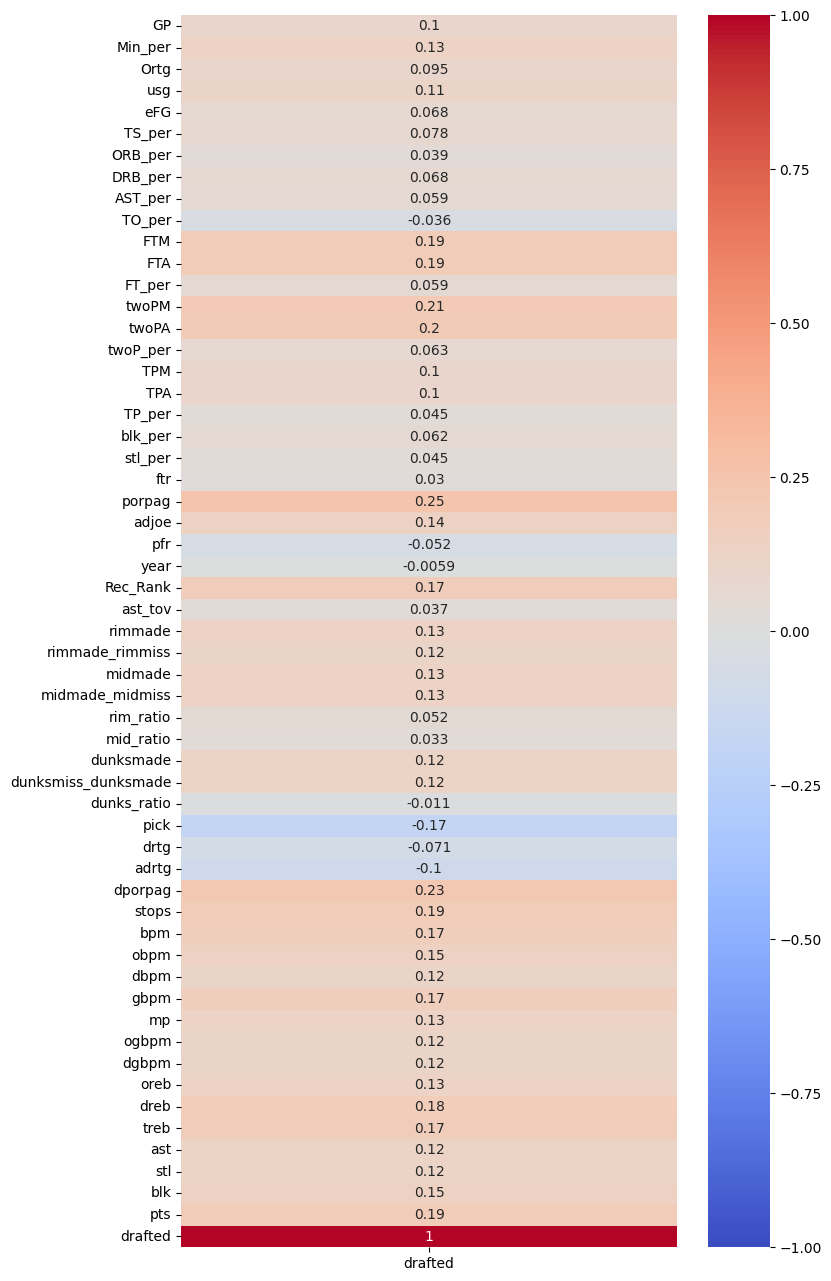

In [15]:
import seaborn as sns

num_cols = df_copy.select_dtypes(include=['int64', 'float64', 'bool']).columns.to_list()

plt.figure(figsize=(8, 16))
sns.heatmap(df_copy[num_cols].corr()[['drafted']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title(f'Correlation with {target_column}')
plt.show()

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y = df_copy['drafted']
# Define the feature matrix (X) by dropping the 'drafted' column from df_copy_cleaned
X = df_copy.drop('drafted', axis=1)
# X_copy = X.drop(columns=['pick'])
# Scaling the value
X_scaled = scaler.fit_transform(X)

### Modeling and Evaluation

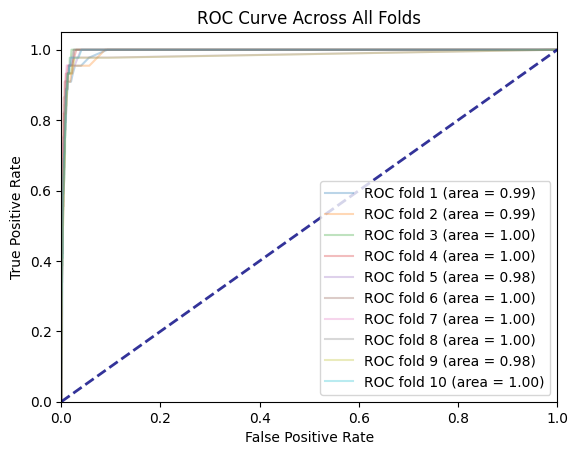

Mean ROC AUC Score from Cross-Validation: 0.9927
Standard Deviation of ROC AUC Scores: 0.0050
Mean Precision Score from Cross-Validation: 0.7517
Standard Deviation of Precision Scores: 0.0839
Mean Recall Score from Cross-Validation: 0.3715
Standard Deviation of Recall Scores: 0.0815

Confusion Matrix for fold 1:
[[4609    9]
 [  31   13]]

Confusion Matrix for fold 2:
[[4616    2]
 [  31   13]]

Confusion Matrix for fold 3:
[[4611    7]
 [  27   17]]

Confusion Matrix for fold 4:
[[4614    4]
 [  22   22]]

Confusion Matrix for fold 5:
[[4612    5]
 [  31   14]]

Confusion Matrix for fold 6:
[[4611    6]
 [  32   13]]

Confusion Matrix for fold 7:
[[4612    5]
 [  25   20]]

Confusion Matrix for fold 8:
[[4613    4]
 [  22   23]]

Confusion Matrix for fold 9:
[[4610    7]
 [  28   16]]

Confusion Matrix for fold 10:
[[4612    5]
 [  30   14]]



In [17]:
from sklearn.model_selection import StratifiedKFold

from group_12_krml_adv_mla_2024.models import evaluation as ev
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier


def plot_confusion_matrix_from_results(results):
    """
    Plot confusion matrices from the results of cross-validation.

    Args:
        results: A dictionary containing confusion matrices for each fold.
    """
    for fold, cm in enumerate(results['confusion_matrices'], 1):
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for Fold {fold}')
        plt.show()

# Initialize Stratified K-Folds
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train and evaluate the model
results = ev.train_and_evaluate_model(X_scaled, y, rf_model, kf)

# Plot ROC curve
ev.plot_roc_curve()

# Print evaluation summary
ev.print_evaluation_summary(results)

# # Plot feature importances
# plot_feature_importance(xgb_model, X)


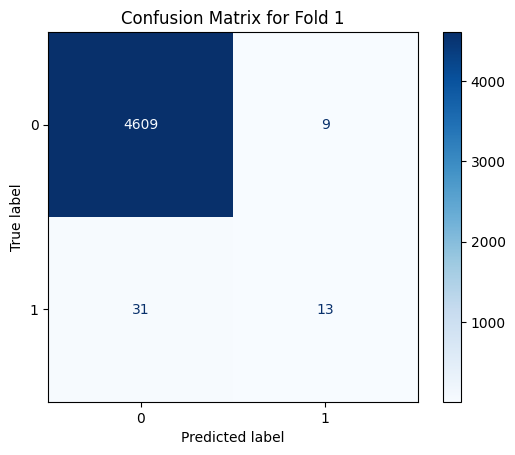

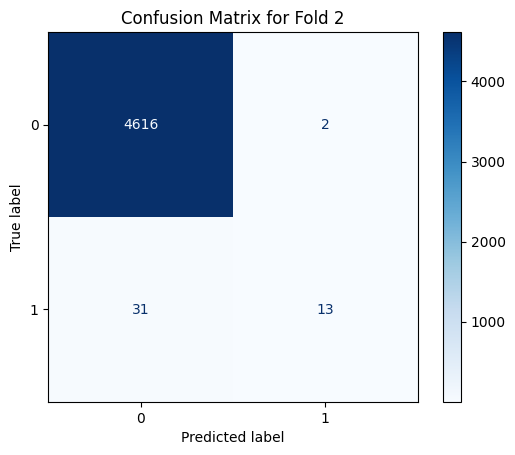

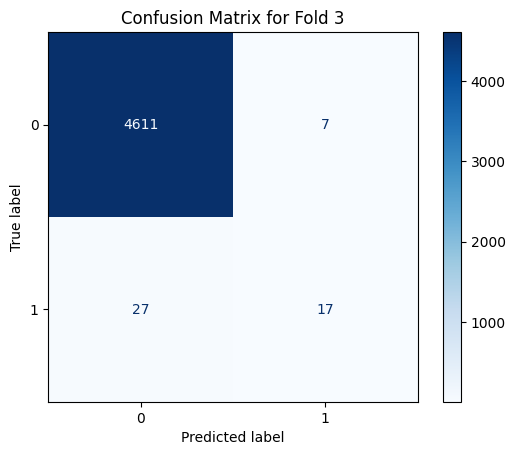

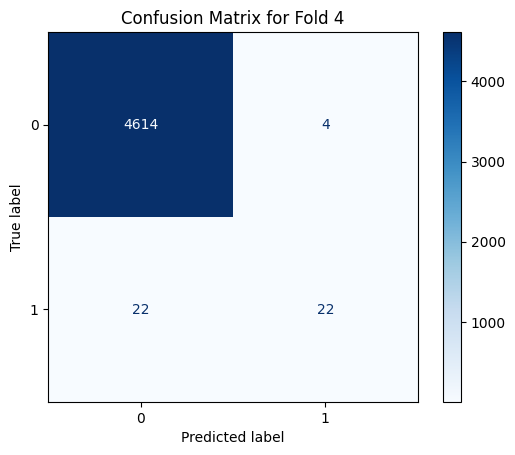

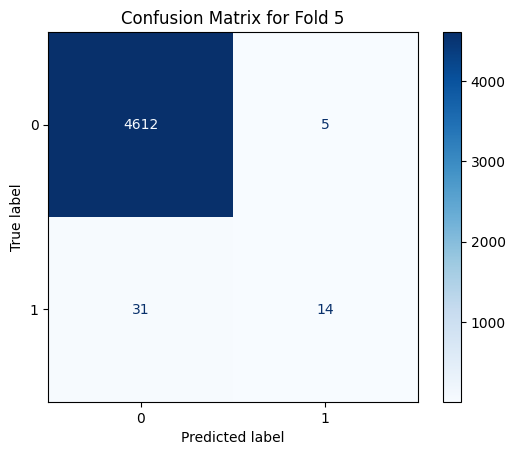

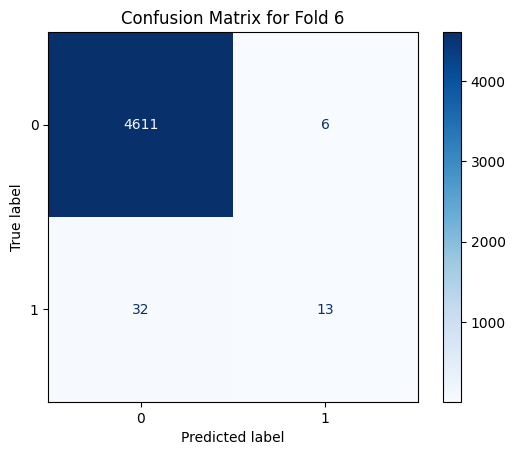

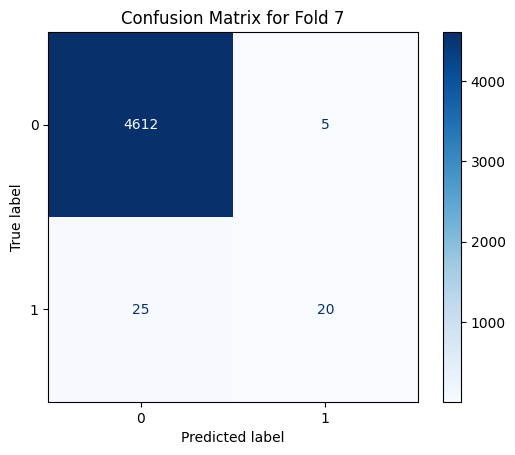

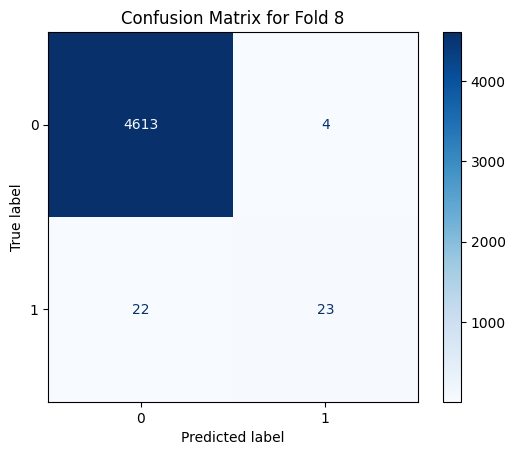

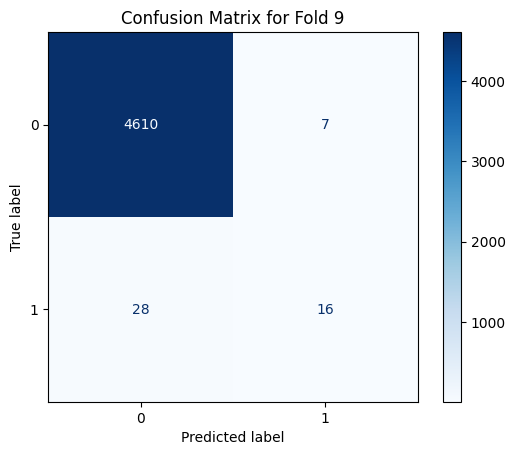

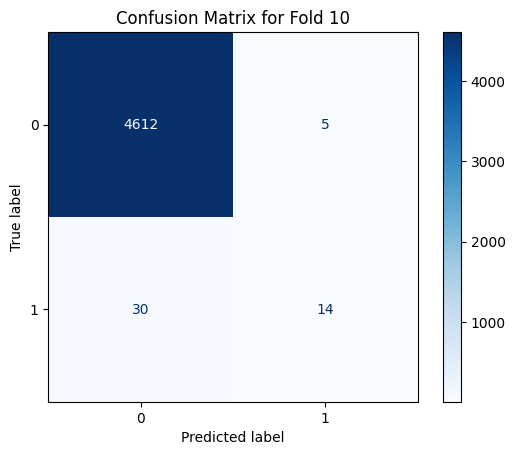

In [18]:
plot_confusion_matrix_from_results(results)

### Testing

In [19]:
test_df_copy = test_df.copy()

In [20]:
# keep the player id separate
player_id = test_df_copy['player_id']
# drop all the category columns for test_df_copy
test_df_copy.drop(columns=cat_cols, inplace=True)

In [21]:
# using the same threshold as in training data
test_df_copy = threshold.using_iqr('test', test_df_copy, ['all'])

In [22]:
# fill NA with Zero
test_df_copy.fillna(train_medians, inplace=True)

In [23]:
# standardize the test df
scaled_test_df = scaler.transform(test_df_copy)

In [24]:
# make prediction
y_test_prob = rf_model.predict_proba(scaled_test_df)[:, 1]


In [25]:
# save the result in the dataframe
results_df = pd.DataFrame({'player_id':player_id, 'drafted':y_test_prob})

results_df.head(5)

,player_id,drafted
0,23549e01-c1b3-4ca0-a0fd-de9b5d76276b,0.00
1,52a518bb-b34a-4b43-adee-5e996cb853fa,0.00
2,ad3d9117-b6bf-4675-ab97-3497acf3e555,0.00
3,eaf66a5c-6f4c-4070-bc70-a99d731b3740,0.00
4,55d07491-5bd1-447f-844e-9cb36eaa442e,0.01


In [26]:
# results_df.to_csv('../data/results/shrestha_dipesh_24996124-week2_retest-RandomForest.csv', index=False)

### Tuning Hyperparameters

In [27]:
from group_12_krml_adv_mla_2024.models import tune_hyperparameters as thyp


In [28]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
    # 'max_features': ['auto', 'sqrt', 'log2']
}

best_model =thyp.tune_hyperparameters(rf_model, param_grid, X_scaled, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best ROC AUC Score: 0.9949


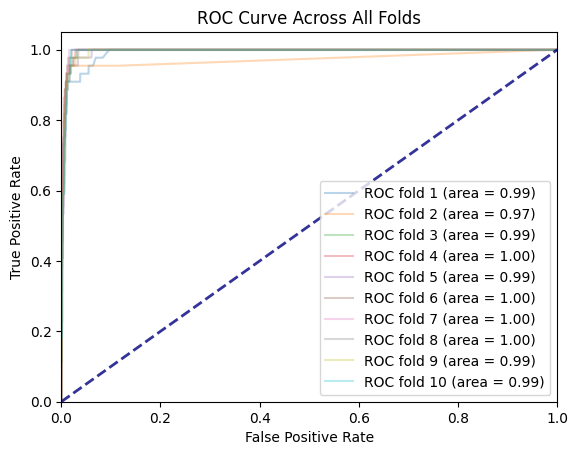

Mean ROC AUC Score from Cross-Validation: 0.9926
Standard Deviation of ROC AUC Scores: 0.0071
Mean Precision Score from Cross-Validation: 0.7746
Standard Deviation of Precision Scores: 0.1029
Mean Recall Score from Cross-Validation: 0.3579
Standard Deviation of Recall Scores: 0.0603

Confusion Matrix for fold 1:
[[4608   10]
 [  31   13]]

Confusion Matrix for fold 2:
[[4617    1]
 [  31   13]]

Confusion Matrix for fold 3:
[[4611    7]
 [  28   16]]

Confusion Matrix for fold 4:
[[4614    4]
 [  25   19]]

Confusion Matrix for fold 5:
[[4612    5]
 [  30   15]]

Confusion Matrix for fold 6:
[[4612    5]
 [  30   15]]

Confusion Matrix for fold 7:
[[4615    2]
 [  29   16]]

Confusion Matrix for fold 8:
[[4614    3]
 [  23   22]]

Confusion Matrix for fold 9:
[[4611    6]
 [  27   17]]

Confusion Matrix for fold 10:
[[4612    5]
 [  31   13]]



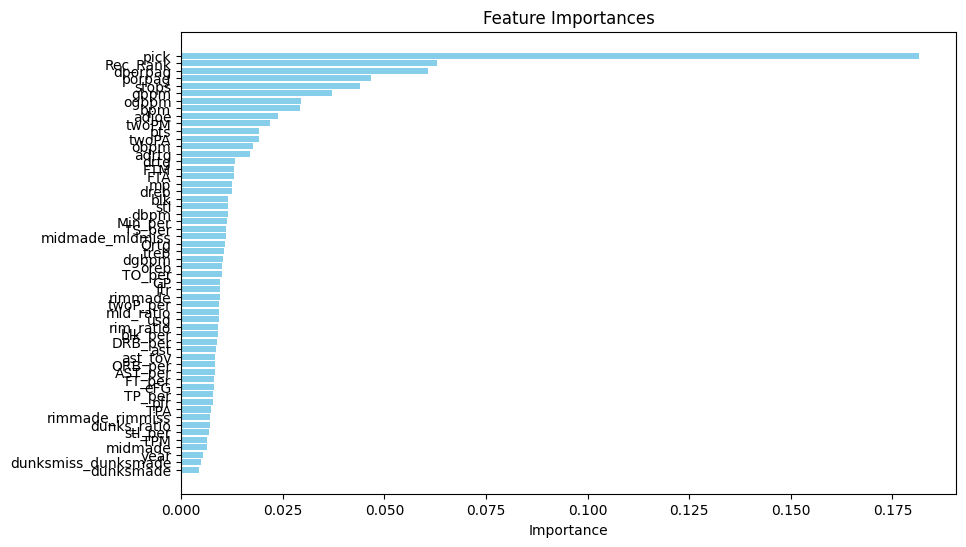

In [29]:
# Train and evaluate the model
results = ev.train_and_evaluate_model(X_scaled, y, best_model, kf)

# Plot ROC curve
ev.plot_roc_curve()

# Print evaluation summary
ev.print_evaluation_summary(results)

# Plot feature importances
ev.plot_feature_importance(best_model, X)

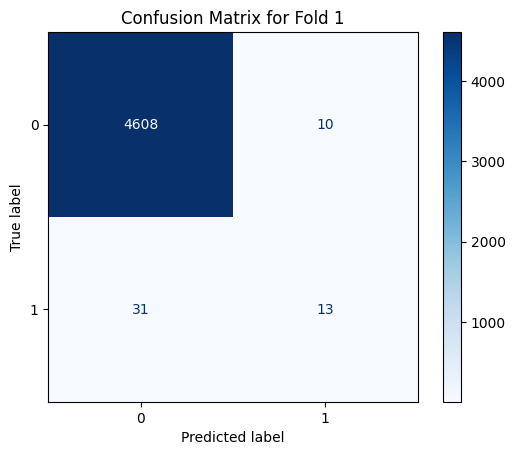

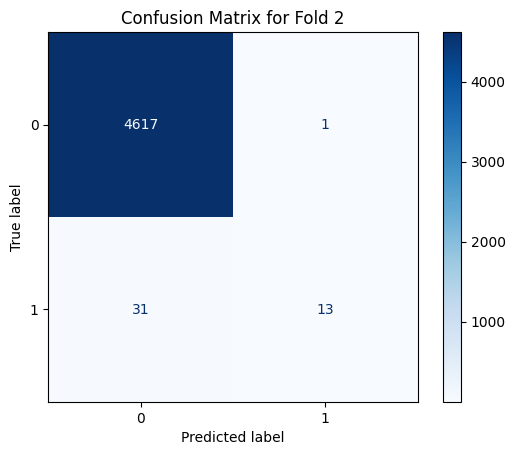

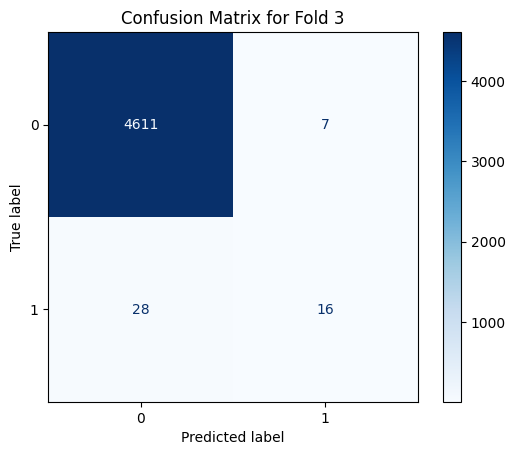

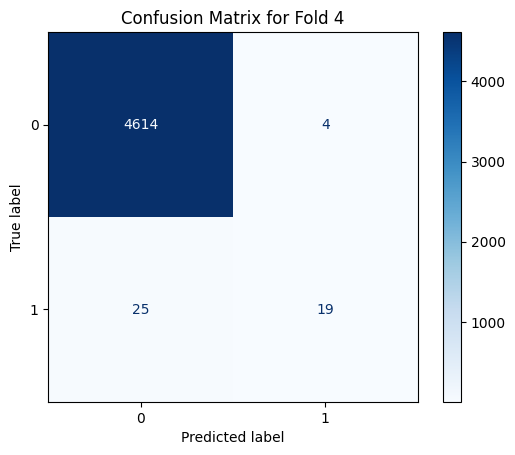

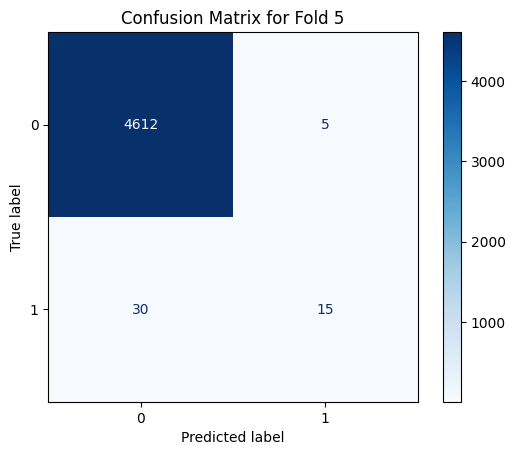

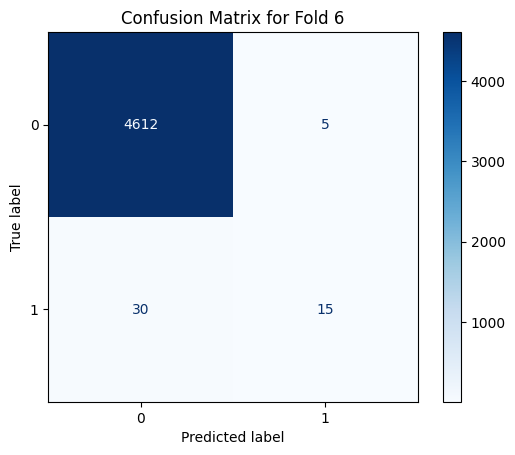

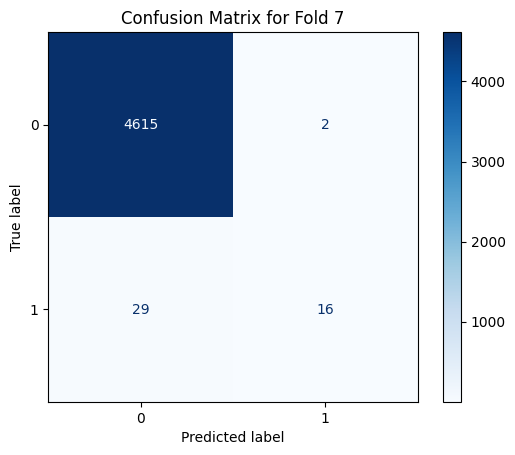

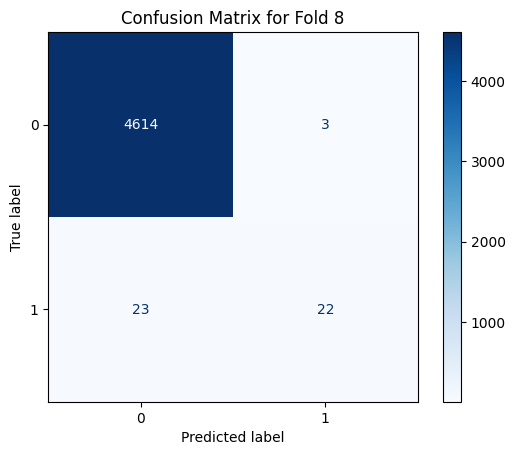

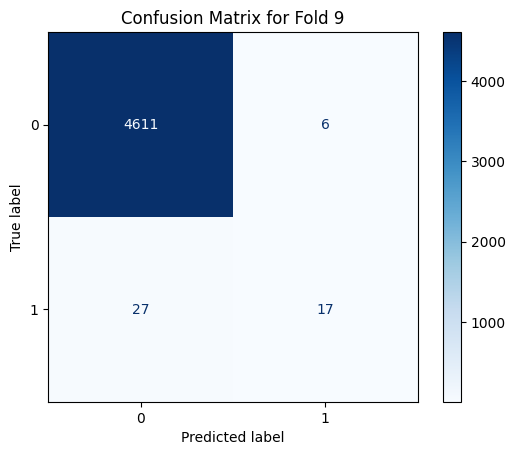

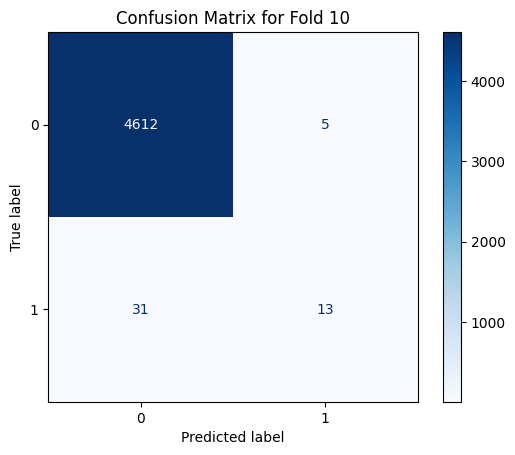

In [30]:
plot_confusion_matrix_from_results(results)

### Testing
Using test data for model testing

In [31]:
# make prediction on the test data
y_test_pred_prob = best_model.predict_proba(scaled_test_df)[:, 1]

# make dataframe to store the result
results_df = pd.DataFrame({'player_id':test_df['player_id'], 'drafted':y_test_pred_prob})
# results_df.to_csv('../data/results/shrestha_dipesh_24996124_week2_retest-Hyperparameter_Tuned-RandomForest.csv', index=False)
results_df.head(5)

,player_id,drafted
0,23549e01-c1b3-4ca0-a0fd-de9b5d76276b,0.000
1,52a518bb-b34a-4b43-adee-5e996cb853fa,0.000
2,ad3d9117-b6bf-4675-ab97-3497acf3e555,0.000
3,eaf66a5c-6f4c-4070-bc70-a99d731b3740,0.000
4,55d07491-5bd1-447f-844e-9cb36eaa442e,0.002
